<a href="https://colab.research.google.com/github/crazy-sam-02/Naan-mudhlavan-/blob/main/digit%20reconization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from PIL import Image
import cv2
from google.colab import files


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8764 - loss: 0.4166 - val_accuracy: 0.9591 - val_loss: 0.1370
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9673 - loss: 0.1057 - val_accuracy: 0.9739 - val_loss: 0.0842
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9795 - loss: 0.0684 - val_accuracy: 0.9716 - val_loss: 0.0936
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9829 - loss: 0.0543 - val_accuracy: 0.9754 - val_loss: 0.0821
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9879 - loss: 0.0385 - val_accuracy: 0.9789 - val_loss: 0.0740


In [4]:
model.save("digit_model.h5")


Saving 5.png to 5 (1).png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


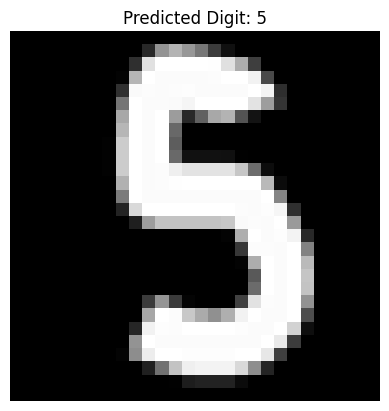

In [9]:
# Upload the image
uploaded = files.upload()

for fn in uploaded.keys():
    # Read the uploaded image
    img = Image.open(fn).convert('L')  # convert to grayscale
    img = img.resize((28, 28))         # resize to 28x28
    img = np.array(img)

    # Invert and normalize image
    img = 255 - img
    img = img / 255.0
    img = img.reshape(1, 28, 28)

    # Load model and predict
    model = load_model("digit_model.h5")
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Digit: {predicted_class}")
    plt.axis('off')
    plt.show()
